<a href="https://colab.research.google.com/github/artelias/an1/blob/main/AN1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import fiona
import seaborn as sns
from pathlib import Path
import pandas as pd



In [11]:
fiona.os.environ['SHAPE_RESTORE_SHX'] = 'YES'
dados= gpd.read_file("/content/GDB DUP.shp")
print(dados.head)


<bound method NDFrame.head of                                                geometry
0     POLYGON ((-53.29476 -33.47738, -53.29320 -33.4...
1     POLYGON ((-36.04869 -5.36418, -36.03944 -5.366...
2     POLYGON ((-46.11216 -23.26924, -46.10930 -23.2...
3     POLYGON ((-43.85963 -18.66345, -43.85918 -18.6...
4     POLYGON ((-43.85963 -18.66212, -43.85911 -18.6...
...                                                 ...
6875  POLYGON ((-44.20063 -18.02992, -44.20050 -18.0...
6876  POLYGON ((-43.01839 -18.29476, -43.01837 -18.2...
6877  POLYGON ((-59.93808 -3.09880, -59.93797 -3.098...
6878  POLYGON ((-47.41337 -22.38373, -47.41350 -22.3...
6879  POLYGON ((-46.43963 -23.38098, -46.43947 -23.3...

[6880 rows x 1 columns]>


## analise exploratoria


In [ ]:
import geobr

brasil = geobr.read_state()

# Plota o mapa do Brasil
ax = brasil.plot(figsize=(10, 10), color='lightgrey', edgecolor='black')

# Plota a camada dos seus dados em cima do mapa
dados.plot(ax=ax, color='green', markersize=5)

plt.title('Mapa do Brasil')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [65]:
caminho_csv = "/content/dup csv.xlsx"
dados_dup = pd.read_excel(caminho_csv)
dados_dup.head()

OBJECTID  UF                                            EMPREEM  AREA_DUP  \
0         1  RS    LI Restrito Col. Geribatu-Sta Vitoria do Palmar       0.0   
1         2  RN  LI Rest.SE Elev.Baixa do Feijão-SE João CâmaraIII       0.0   
2         3  SP        LD ETC Masterfoods à SE Mairiporã-Jaguari I       0.0   
3         4  MG                                          Quartel I       0.0   
4         5  MG                                          Quartel I       0.0   

  CODDUP  AreaCalculada      ATO_LEGAL       CRIADOR DATA_CRIACAO  \
0             27.991209  REA 4598/2014  sgi_editor_7   2015-08-11   
1             79.331613  REA 5195/2015  sgi_editor_7   2015-08-11   
2             22.038676  REA 5224/2015  sgi_editor_7   2015-08-18   
3             20.473069  REA 5416/2015  sgi_editor_7   2015-09-15   
4              8.175118  REA 5416/2015  sgi_editor_7   2015-09-15   

    ATUALIZADOR  ... ANO_DUP  DATUM_TEXT           FUSO_TEXT  \
0  SGI_EDITOR_1  ...    2014  SIRGAS2000  UTM 22 S (MER -51)   
1  SGI_EDITOR_1  ...    2015  SIRGAS2000  UTM 24 S (MER -39)   
2  SGI_EDITOR_1  ...    2015  SIRGAS2000  UTM 23 S (MER -45)   
3  SGI_EDITOR_1  ...    2015  SIRGAS2000  UTM 23 S (MER -45)   
4  SGI_EDITOR_1  ...    2015  SIRGAS2000  UTM 23 S (MER -45)   

                MODALIDADE                     OBJETO_TEXT  STATUS_TEXT  \
0  Servidão Administrativa    Linhas de Interesse Restrito   Autorizado   
1  Servidão Administrativa    Linhas de Interesse Restrito   Autorizado   
2  Servidão Administrativa          Linhas de Distribuição   Autorizado   
3           Desapropriação  Área de Preservação Permanente   Autorizado   
4           Desapropriação  Área de Preservação Permanente   Autorizado   

    VERSAO_ATUAL Tensao SHAPE_Length SHAPE_Area  
0  Versão Válida    NaN     0.211417   0.000027  
1  Versão Válida    NaN     0.358850   0.000065  
2  Versão Válida    NaN     0.136205   0.000019  
3  Versão Válida    NaN     0.039320   0.000018  
4  Versão Válida    NaN     0.017210   0.000007  

[5 rows x 26 columns]

In [66]:
print(dados_dup.describe())


          OBJECTID       AREA_DUP  AreaCalculada  ID_EMPREENDIMENTO  \
count  6880.000000    6238.000000    6874.000000        2985.000000   
mean   3440.500000     134.597327     239.620544       30273.516583   
std    1986.229258    2264.289808    3502.402236        7751.959897   
min       1.000000       0.000000       0.000000          12.000000   
25%    1720.750000       0.000000       0.125207       29114.000000   
50%    3440.500000       0.324433       1.454734       30973.000000   
75%    5160.250000       5.875093      18.638162       34865.000000   
max    6880.000000  141130.308900  195568.267510       47292.000000   

              ID_LT        ID_SBE      ANO_DUP       Tensao  SHAPE_Length  \
count     21.000000    157.000000  6880.000000  3611.000000   6880.000000   
mean   18259.238095   2992.554140  2018.055233   180.341565      0.312749   
std    12862.377914   3533.327159     4.038789   165.071057      1.181979   
min        0.000000      0.000000  2002.000000     6

### Utilizando graficos pra entender formas de analisar problemas


<ipython-input-67-9f6d73ea1cfc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=dados_sem_cod_id, palette="viridis")


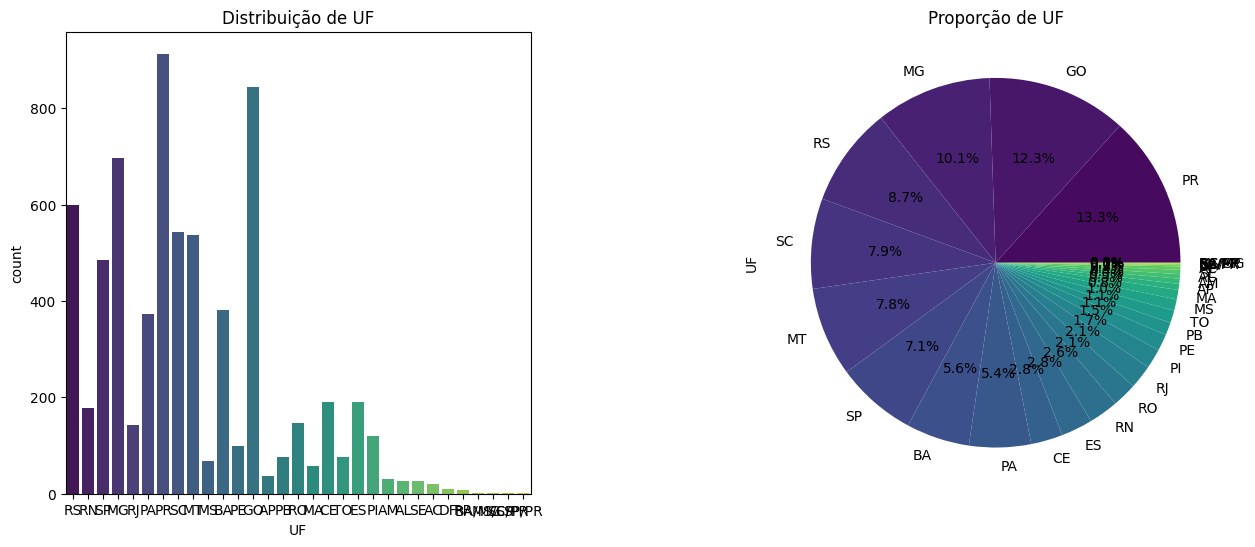

<ipython-input-67-9f6d73ea1cfc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=dados_sem_cod_id, palette="viridis")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


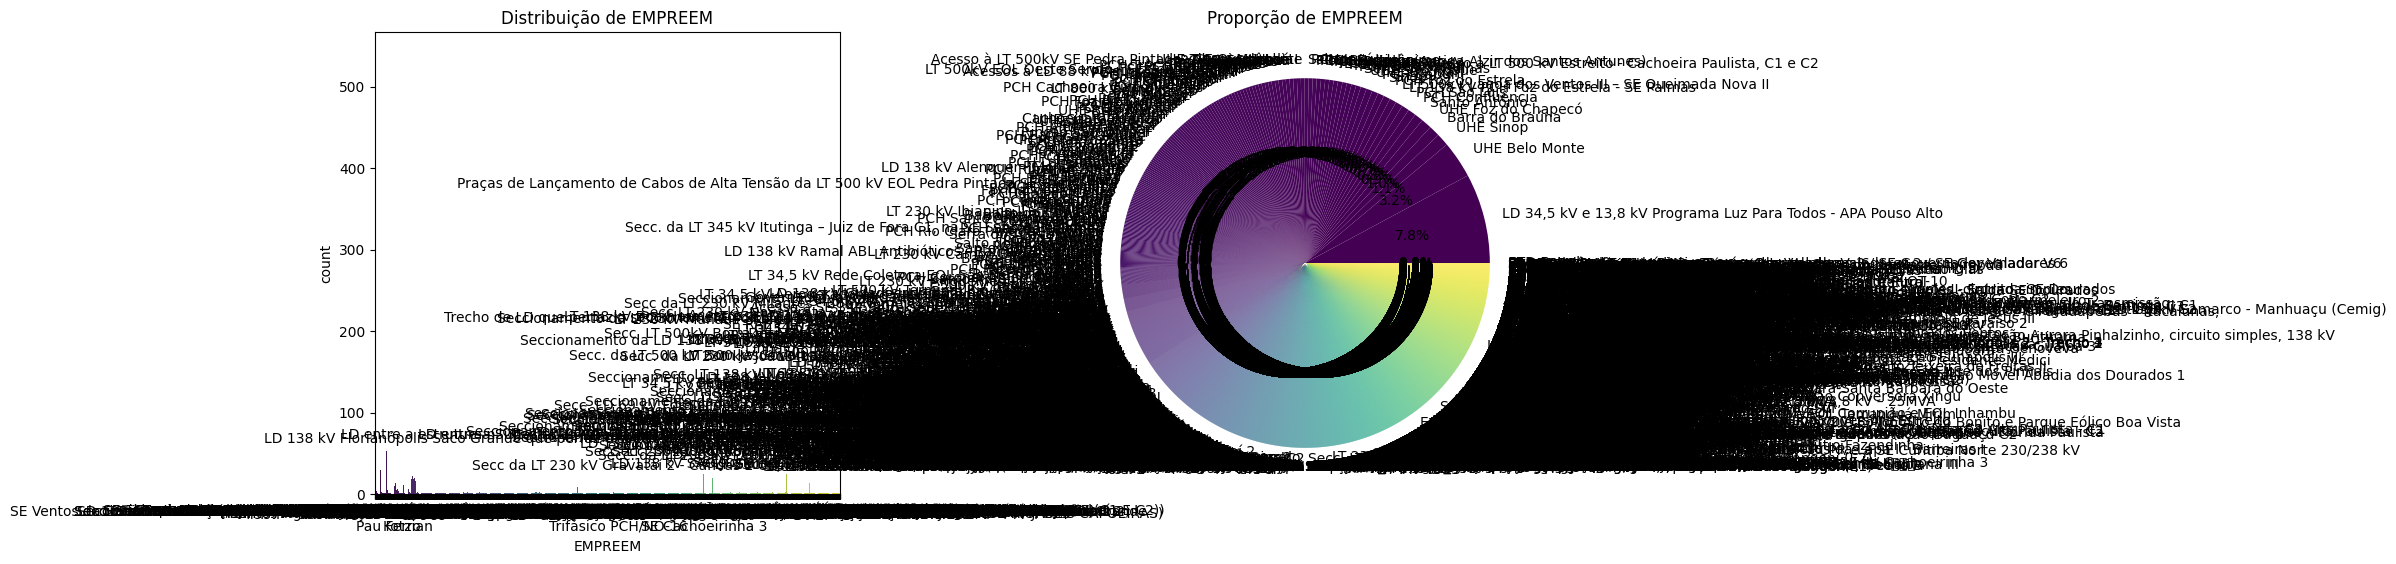

<ipython-input-67-9f6d73ea1cfc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=dados_sem_cod_id, palette="viridis")


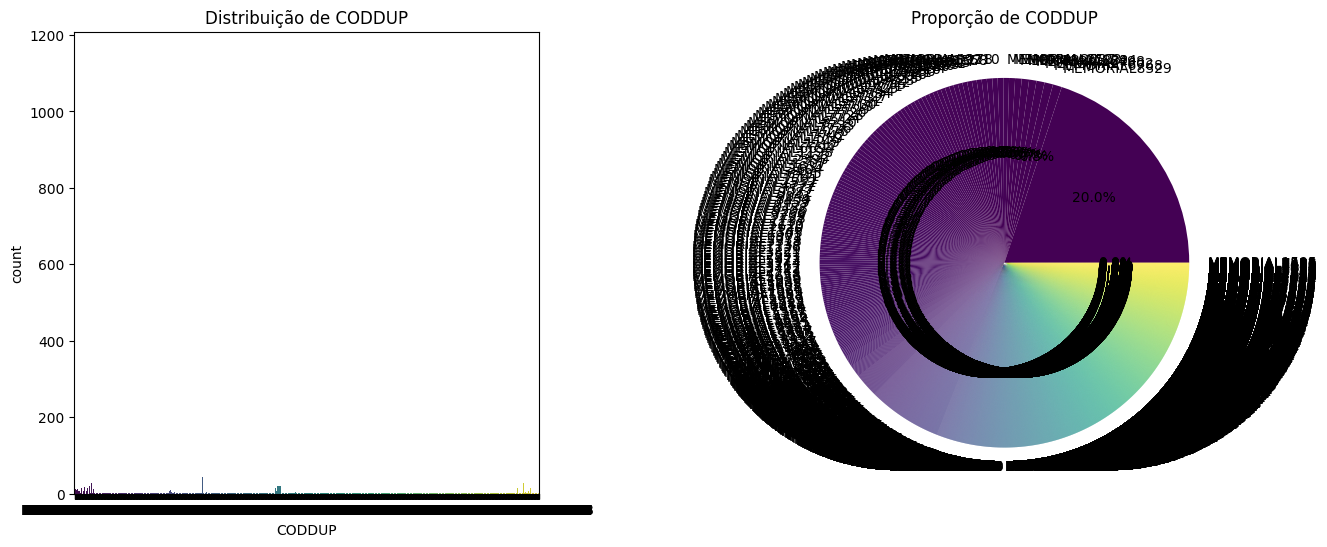

<ipython-input-67-9f6d73ea1cfc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=dados_sem_cod_id, palette="viridis")


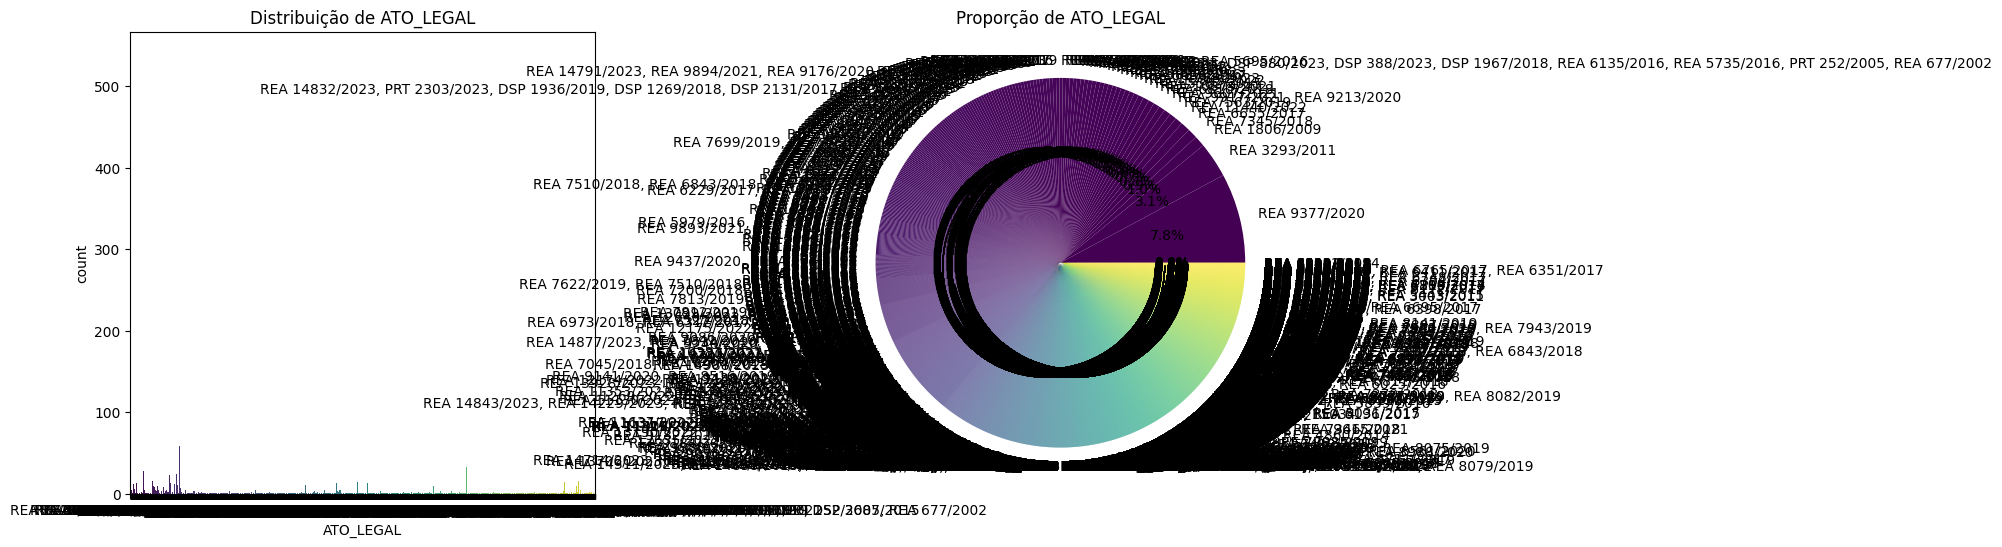

<ipython-input-67-9f6d73ea1cfc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=dados_sem_cod_id, palette="viridis")


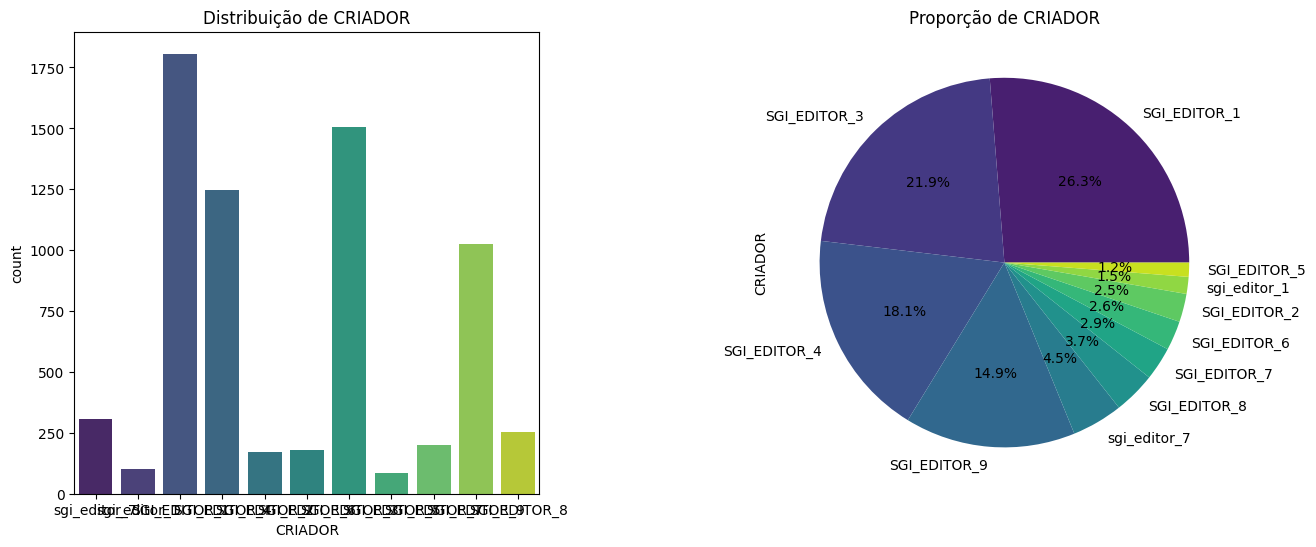

<ipython-input-67-9f6d73ea1cfc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=dados_sem_cod_id, palette="viridis")


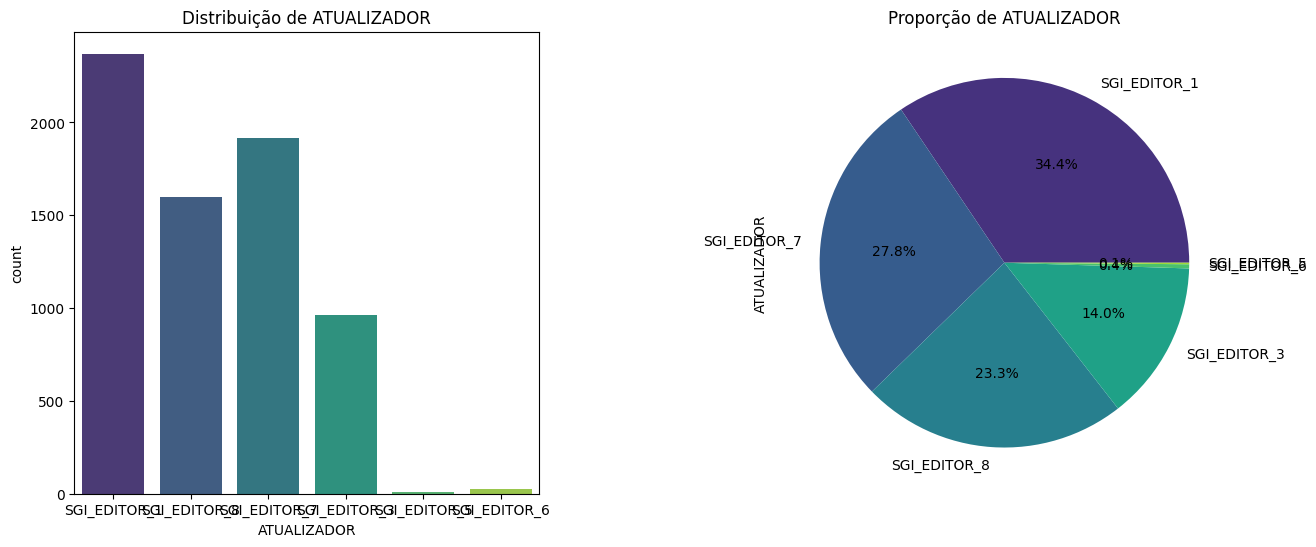

<ipython-input-67-9f6d73ea1cfc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=dados_sem_cod_id, palette="viridis")


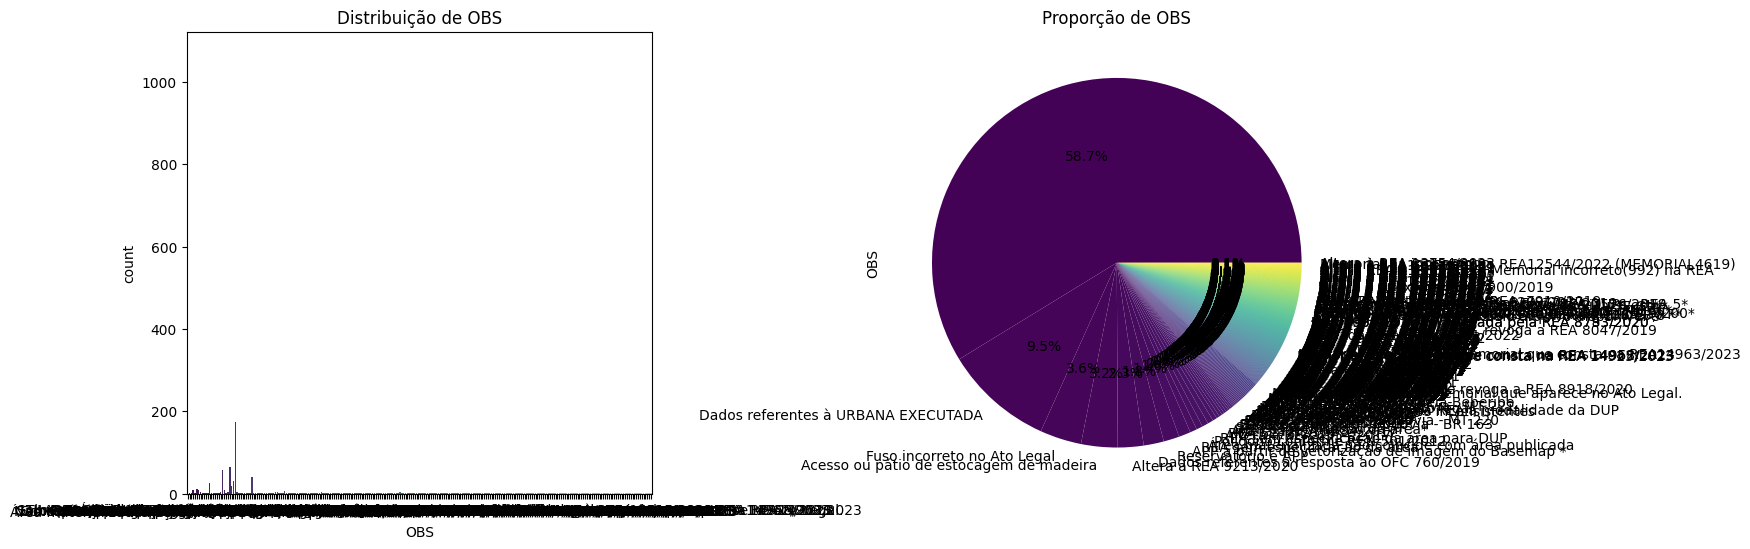

<ipython-input-67-9f6d73ea1cfc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=dados_sem_cod_id, palette="viridis")


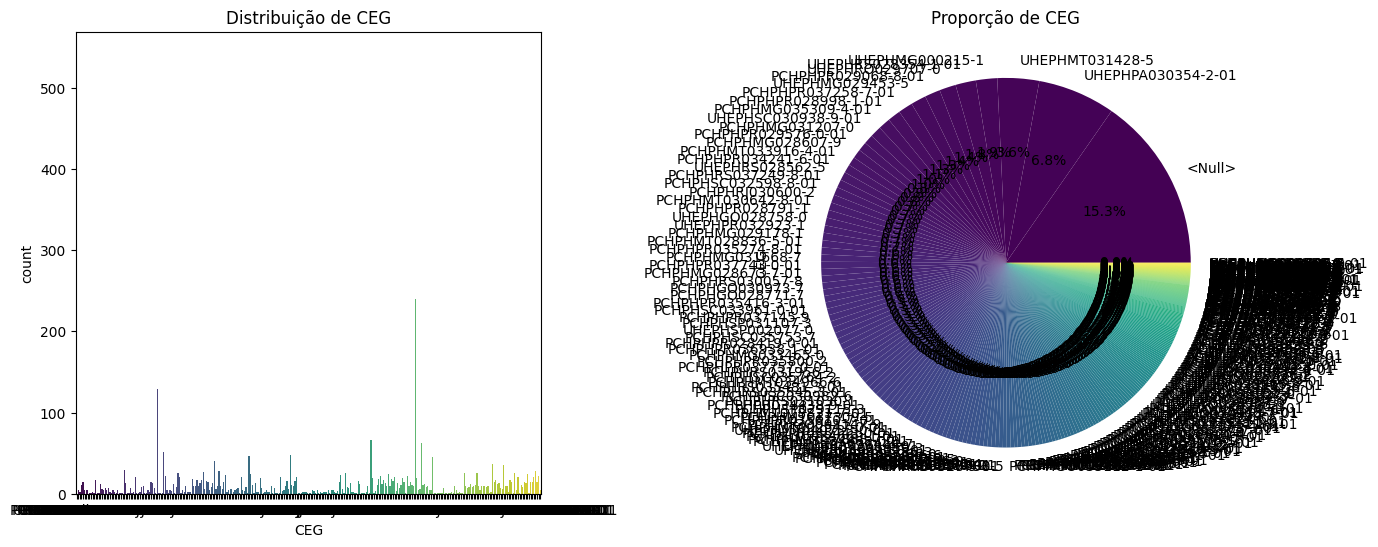

<ipython-input-67-9f6d73ea1cfc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=dados_sem_cod_id, palette="viridis")


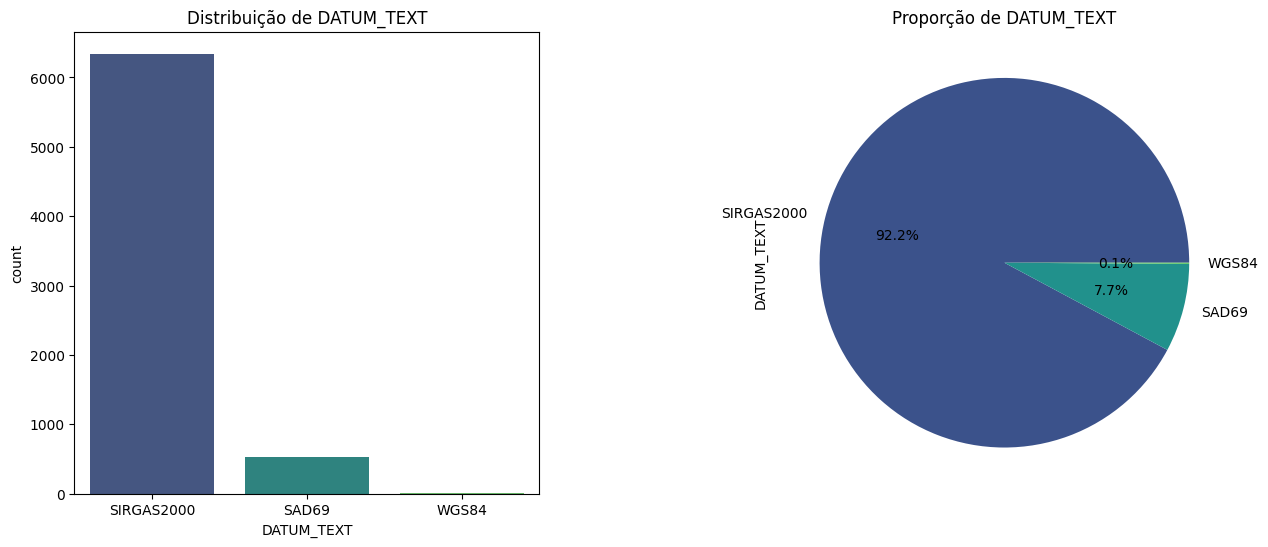

<ipython-input-67-9f6d73ea1cfc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=dados_sem_cod_id, palette="viridis")


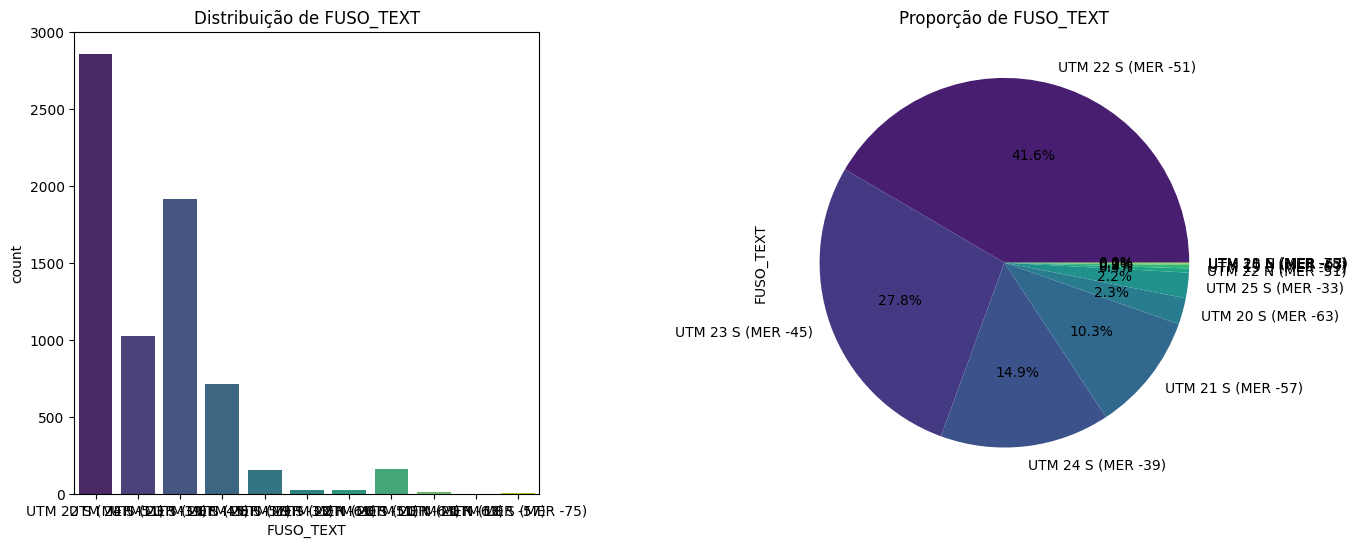

<ipython-input-67-9f6d73ea1cfc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=dados_sem_cod_id, palette="viridis")


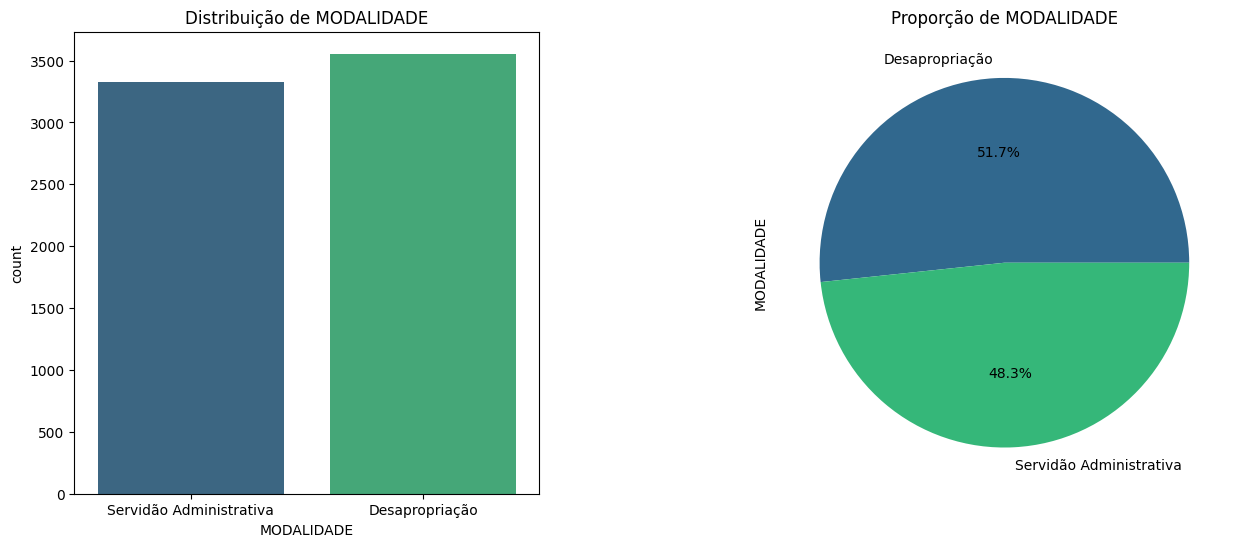

<ipython-input-67-9f6d73ea1cfc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=dados_sem_cod_id, palette="viridis")


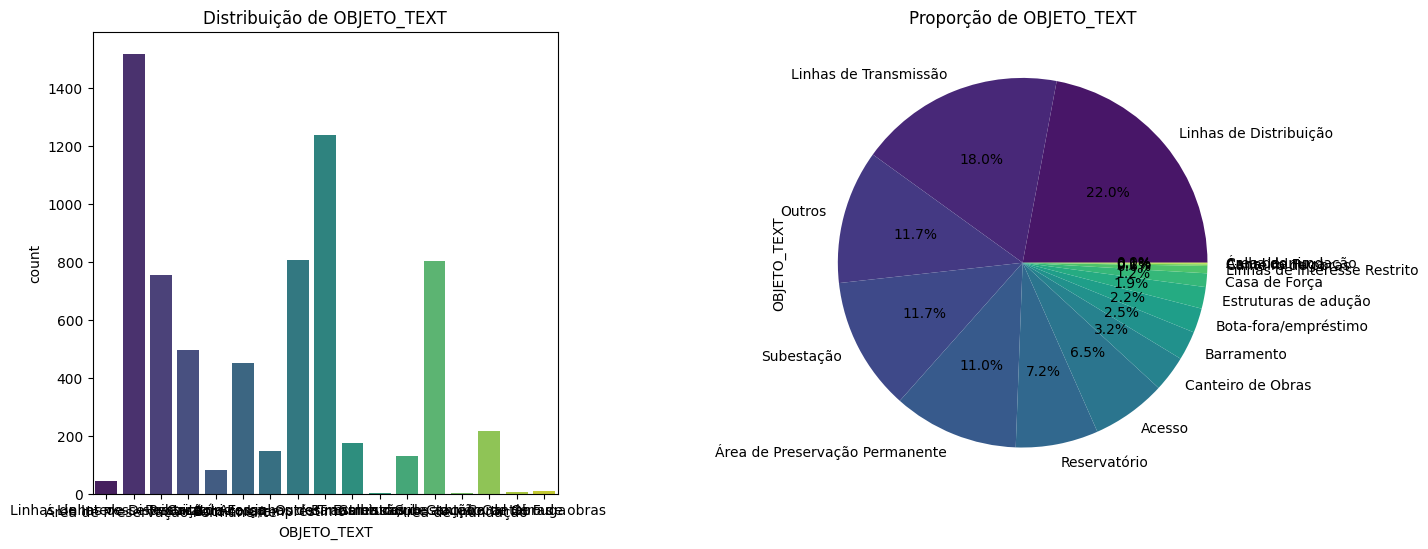

<ipython-input-67-9f6d73ea1cfc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=dados_sem_cod_id, palette="viridis")


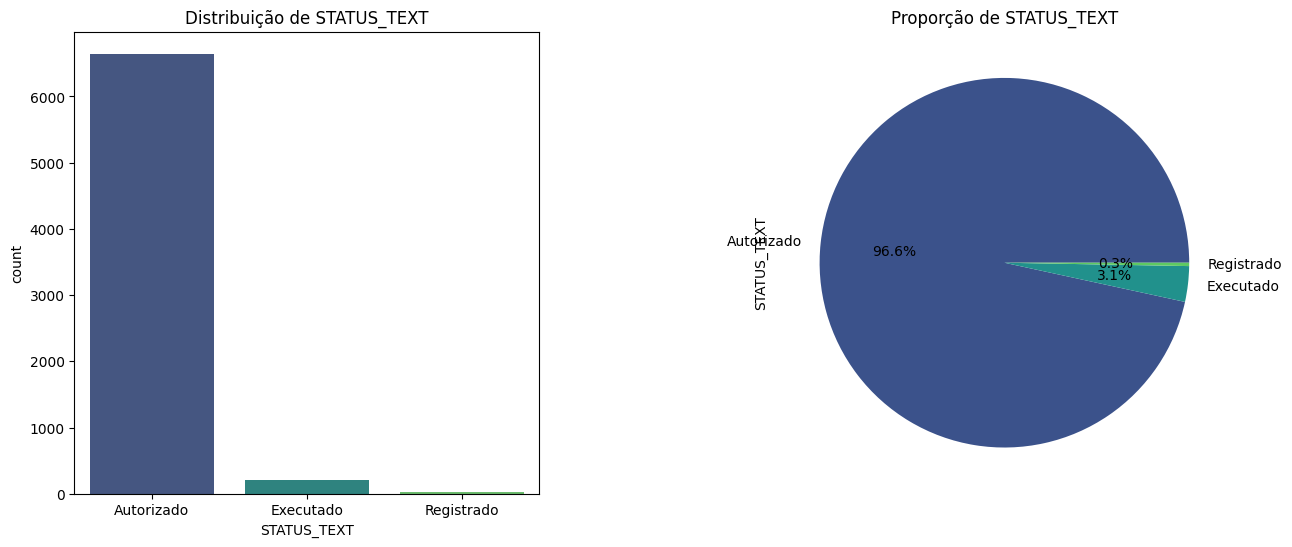

<ipython-input-67-9f6d73ea1cfc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=dados_sem_cod_id, palette="viridis")


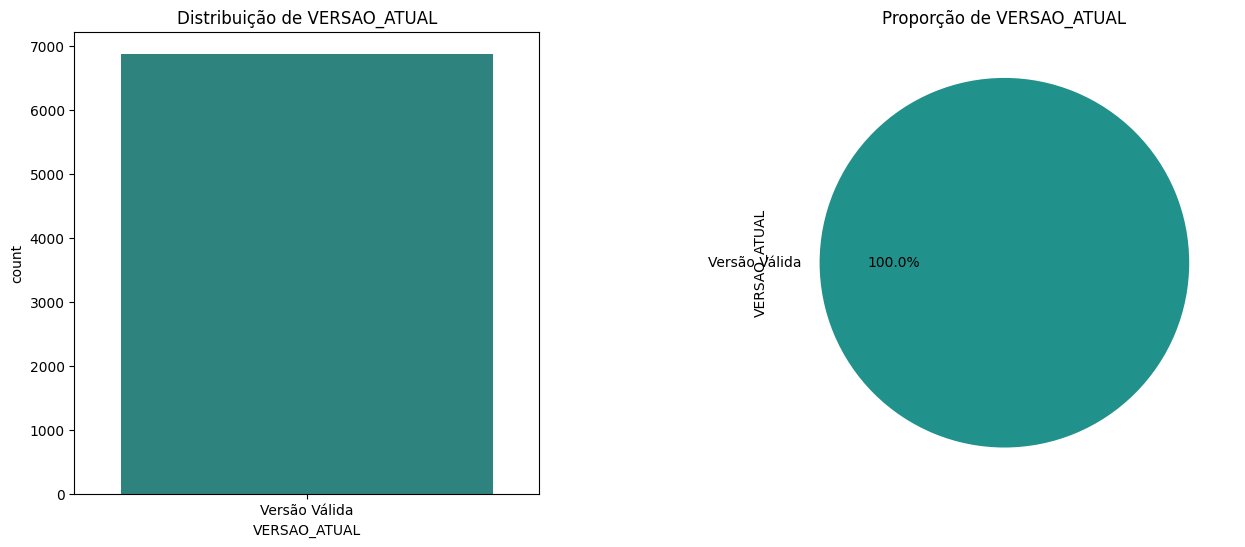

In [67]:
dados_sem_cod_id = dados_dup.drop("OBJECTID", axis=1)

desc_stats_quantitativas = dados_sem_cod_id.describe()

for coluna in dados_sem_cod_id.select_dtypes(include="object").columns:
    plt.figure(figsize=(15, 6))
    plt.subplots_adjust(wspace=0.5)
    plt.subplot(1, 2, 1)
    sns.countplot(x=coluna, data=dados_sem_cod_id, palette="viridis")
    plt.title(f'Distribuição de {coluna}')

    plt.subplot(1, 2, 2)
    dados_sem_cod_id[coluna].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("viridis", len(dados_sem_cod_id[coluna].unique())))
    plt.title(f'Proporção de {coluna}')

    plt.show()


In [91]:
from sqlalchemy import create_engine
tensao_valida = [69, 138, 230, 345]

divergentes = dados_dup[~dados_dup['Tensao'].isin(tensao_valida)]

engine = create_engine('sqlite:///divergentes.db', echo=False)

divergentes.to_sql('divergencias', con=engine, if_exists='replace', index=False)


4750

## DADOS DIVERGENTES PELA TENSÂO

In [93]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('/content/divergentes.db')

sql_query = "SELECT * FROM divergencias"

df_divergencias = pd.read_sql_query(sql_query, conn)

conn.close()

print(df_divergencias.head())


   OBJECTID  UF                                            EMPREEM  AREA_DUP  \
0         1  RS    LI Restrito Col. Geribatu-Sta Vitoria do Palmar       0.0   
1         2  RN  LI Rest.SE Elev.Baixa do Feijão-SE João CâmaraIII       0.0   
2         3  SP        LD ETC Masterfoods à SE Mairiporã-Jaguari I       0.0   
3         4  MG                                          Quartel I       0.0   
4         5  MG                                          Quartel I       0.0   

  CODDUP  AreaCalculada      ATO_LEGAL       CRIADOR  \
0             27.991209  REA 4598/2014  sgi_editor_7   
1             79.331613  REA 5195/2015  sgi_editor_7   
2             22.038676  REA 5224/2015  sgi_editor_7   
3             20.473069  REA 5416/2015  sgi_editor_7   
4              8.175118  REA 5416/2015  sgi_editor_7   

                 DATA_CRIACAO   ATUALIZADOR  ... ANO_DUP  DATUM_TEXT  \
0  2015-08-11 00:00:00.000000  SGI_EDITOR_1  ...    2014  SIRGAS2000   
1  2015-08-11 00:00:00.000000  SGI_EDI

Tenho 4750 dados com tensão diferentes do comun.


          OBJECTID       AREA_DUP  AreaCalculada  ID_EMPREENDIMENTO  \
count  4750.000000    4260.000000    4748.000000        2976.000000   
mean   3024.676842     151.556967     325.222353       30300.553091   
std    2063.402481    2464.955682    4204.670161        7711.819901   
min       1.000000       0.000000       0.000000          12.000000   
25%    1188.250000       0.000000       0.156072       29114.000000   
50%    2726.000000       0.414750       1.449623       30973.000000   
75%    4783.750000       6.744724      16.353904       34865.000000   
max    6880.000000  141130.308900  195568.267510       47292.000000   

              ID_LT        ID_SBE      ANO_DUP       Tensao  SHAPE_Length  \
count      6.000000     90.000000  4750.000000  1481.000000   4750.000000   
mean   24182.333333   3456.955556  2017.441263   228.596482      0.299959   
std    14960.821377   4516.543217     4.386111   235.714860      1.354904   
min        0.000000      0.000000  2002.000000     6

<ipython-input-50-104e85d7125f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=divergentes, palette="viridis")


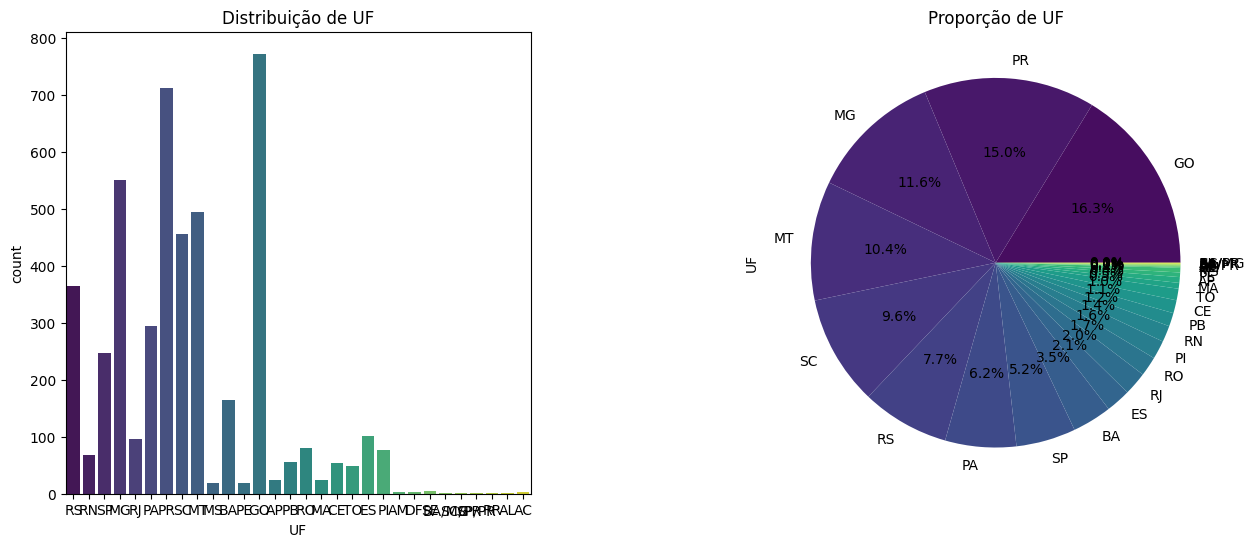

<ipython-input-50-104e85d7125f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=divergentes, palette="viridis")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


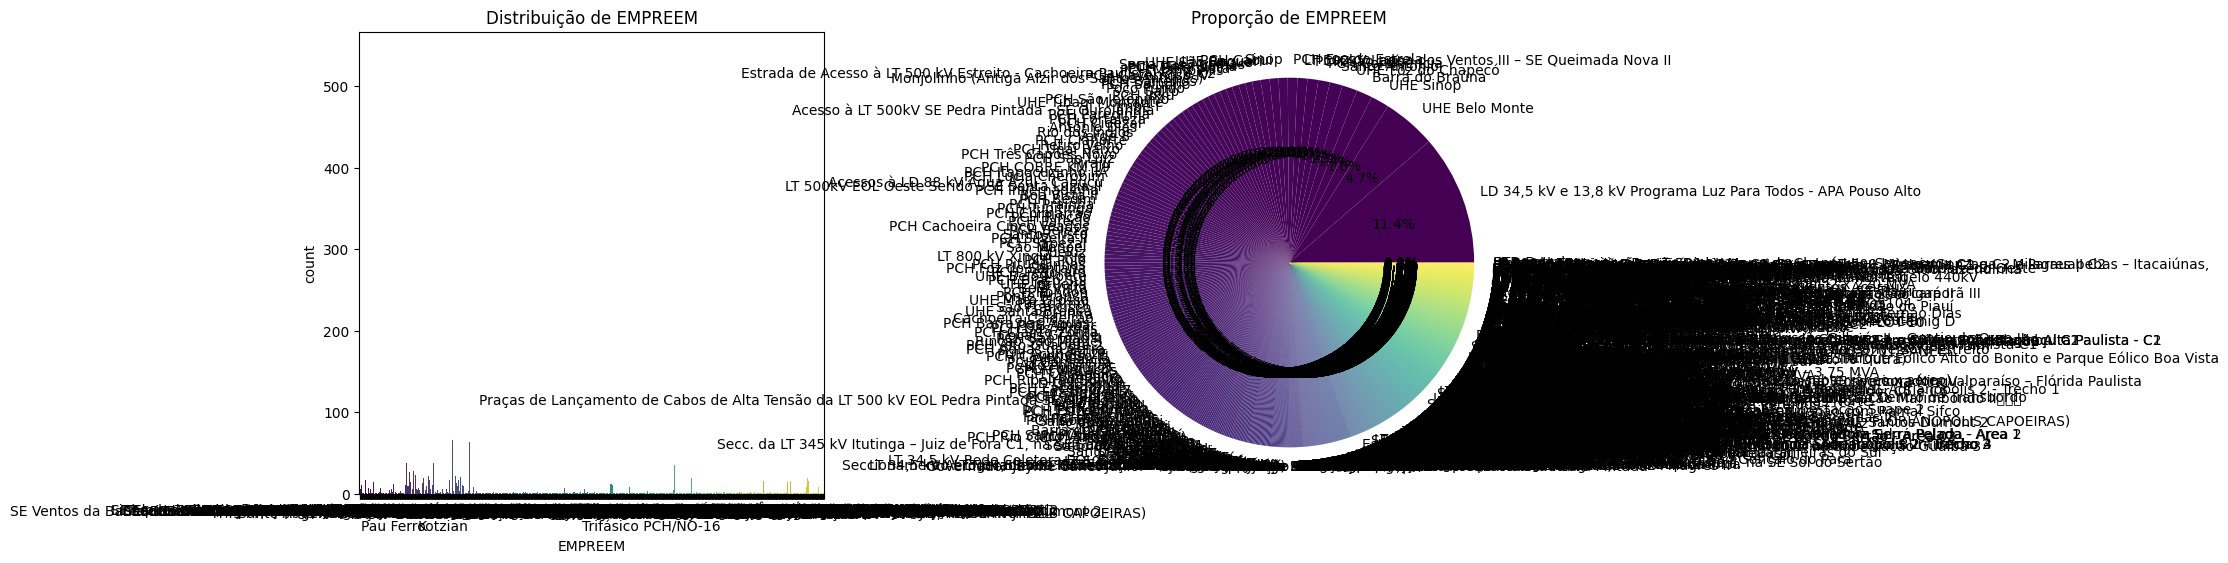

<ipython-input-50-104e85d7125f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=divergentes, palette="viridis")


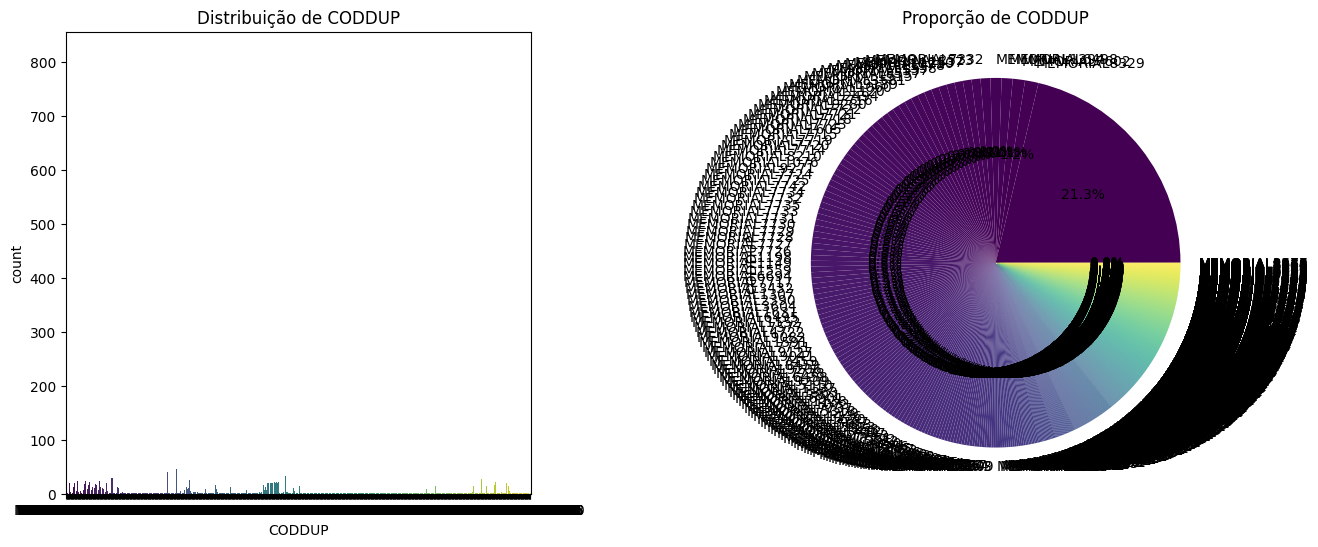

<ipython-input-50-104e85d7125f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=divergentes, palette="viridis")


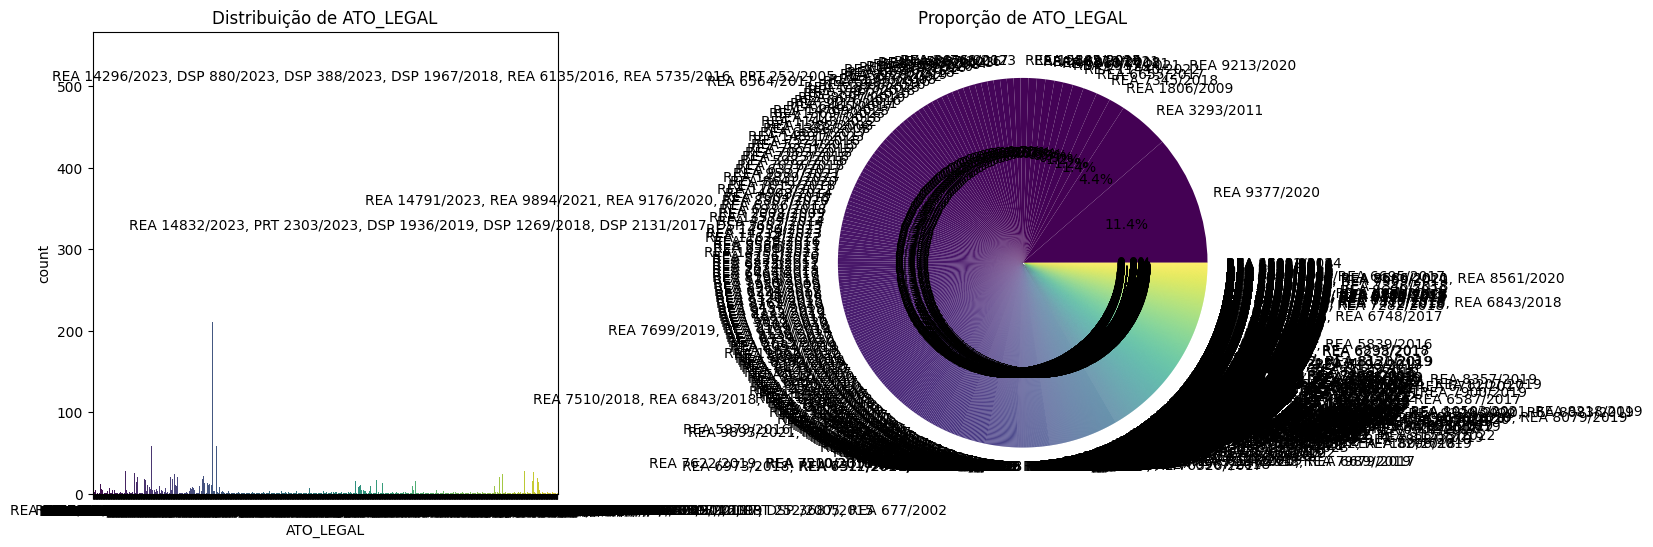

<ipython-input-50-104e85d7125f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=divergentes, palette="viridis")


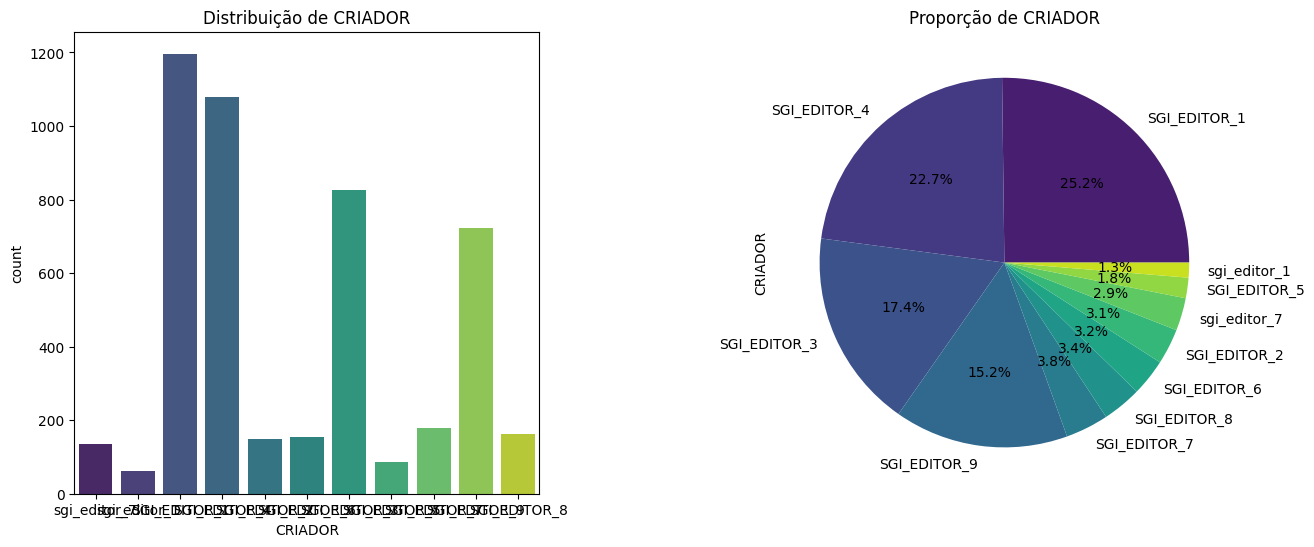

<ipython-input-50-104e85d7125f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=divergentes, palette="viridis")


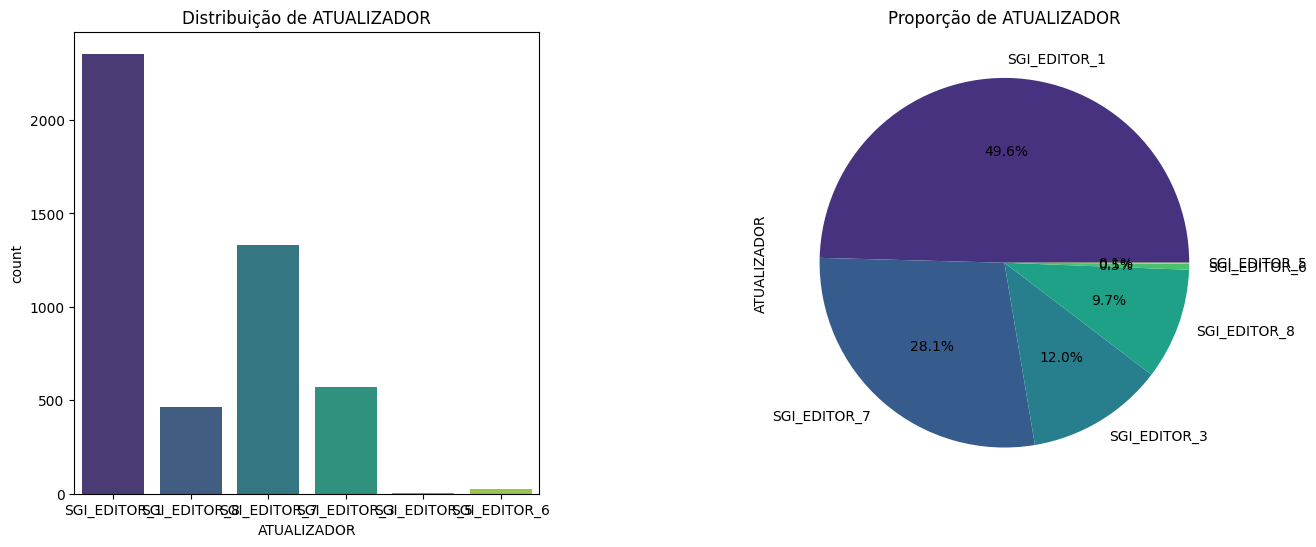

<ipython-input-50-104e85d7125f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=divergentes, palette="viridis")


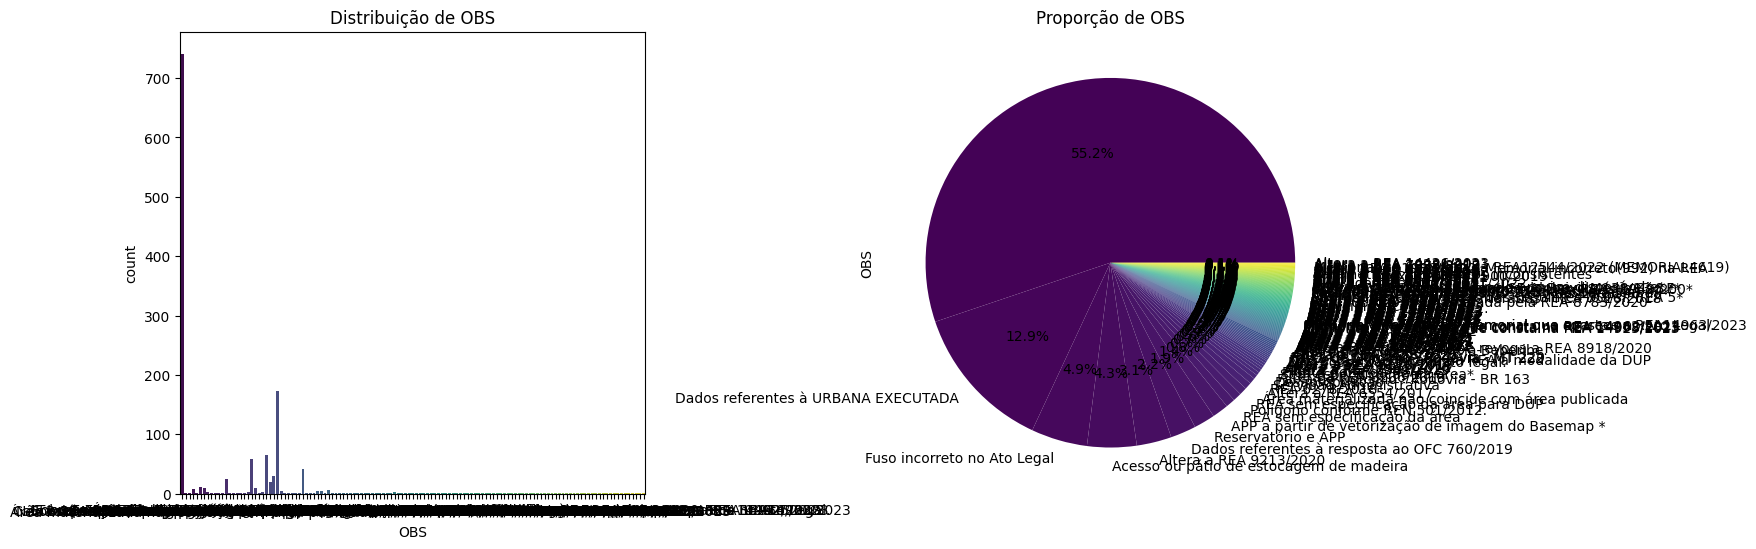

<ipython-input-50-104e85d7125f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=divergentes, palette="viridis")


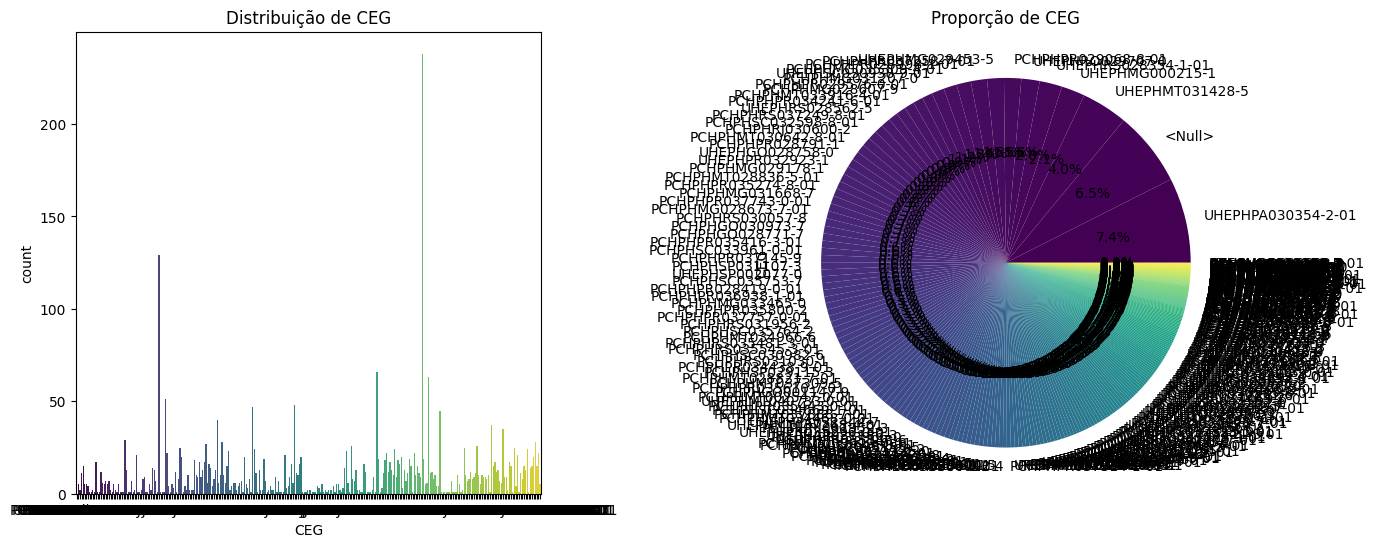

<ipython-input-50-104e85d7125f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=divergentes, palette="viridis")


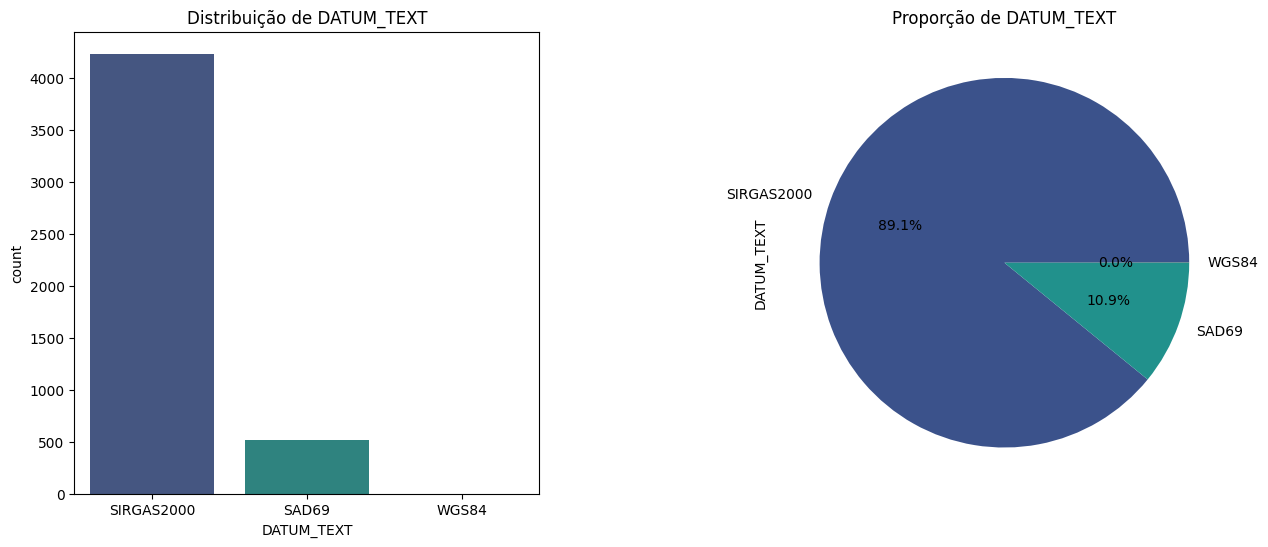

<ipython-input-50-104e85d7125f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=divergentes, palette="viridis")


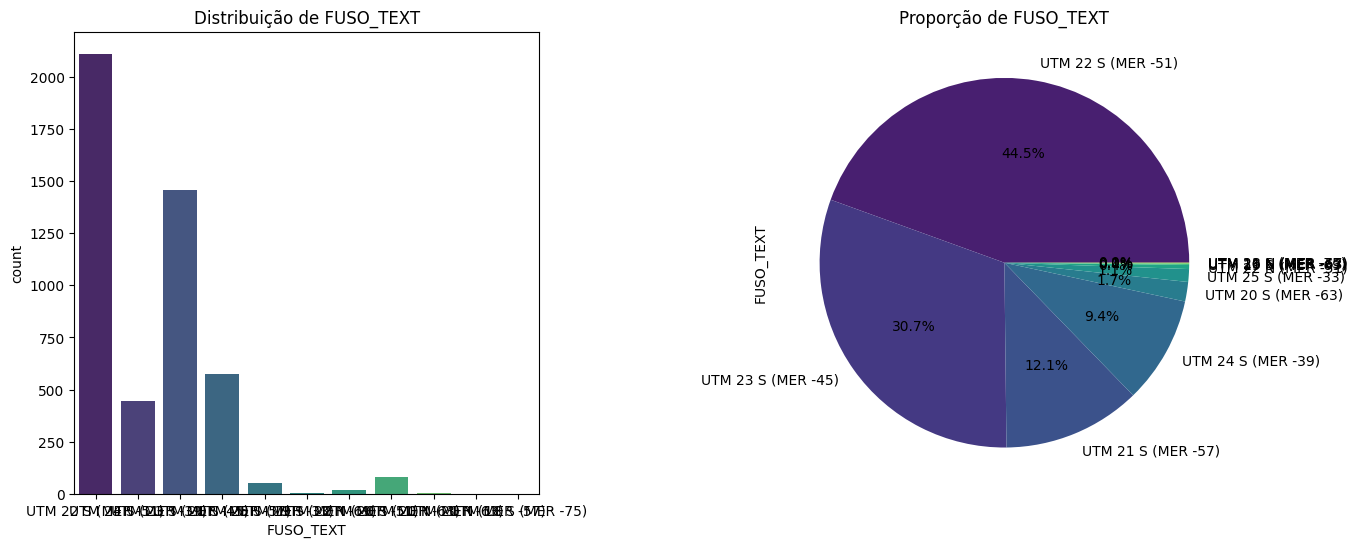

<ipython-input-50-104e85d7125f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=divergentes, palette="viridis")


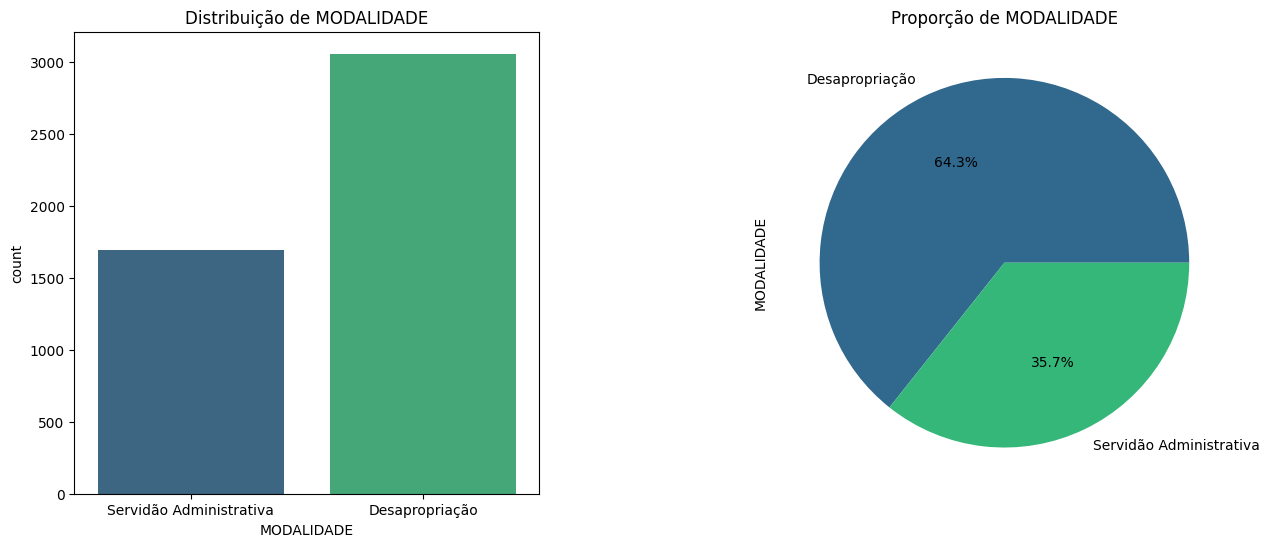

<ipython-input-50-104e85d7125f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=divergentes, palette="viridis")


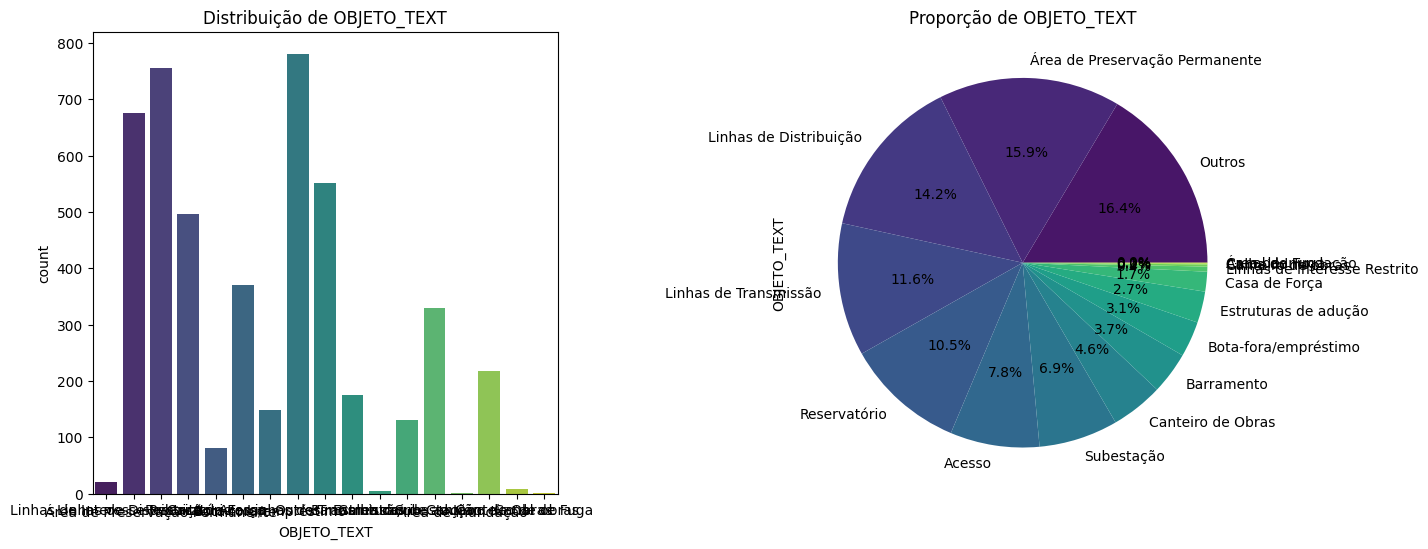

<ipython-input-50-104e85d7125f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=divergentes, palette="viridis")


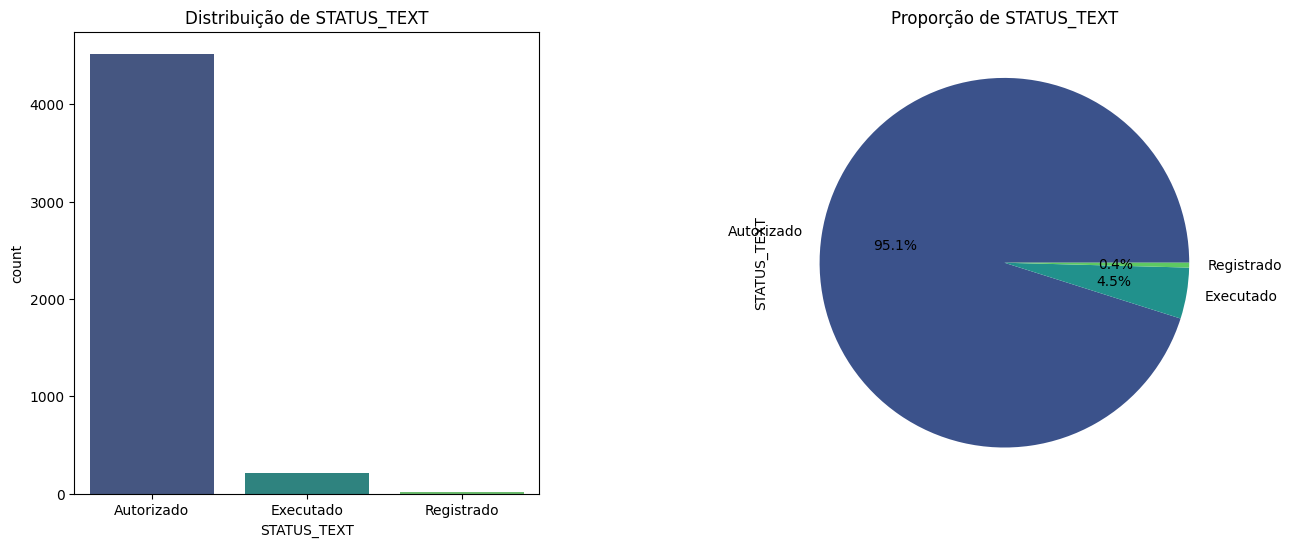

<ipython-input-50-104e85d7125f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coluna, data=divergentes, palette="viridis")


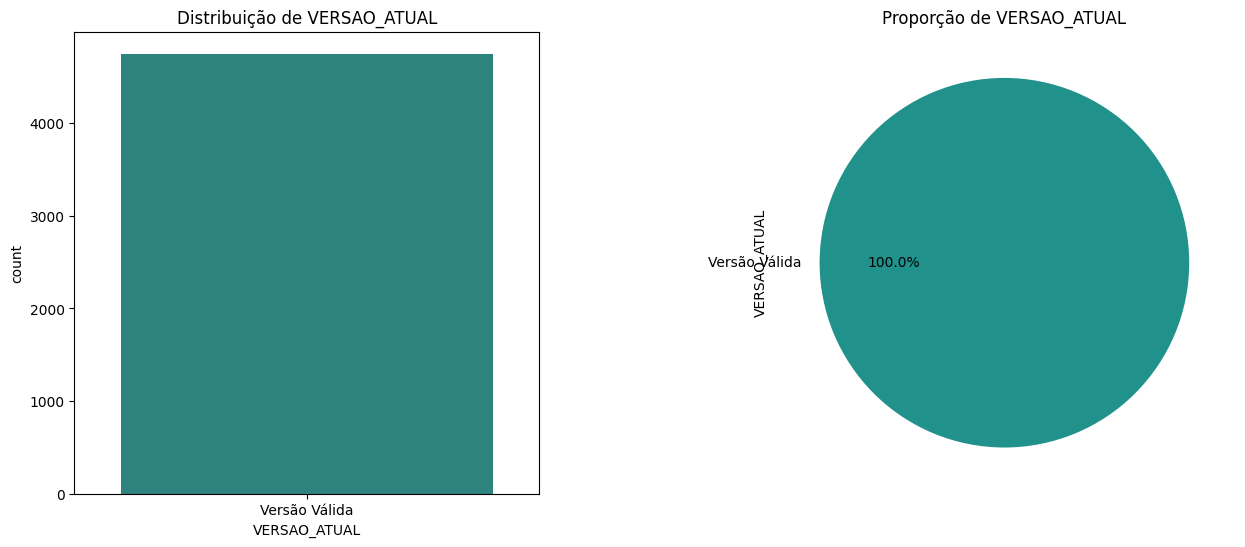

<ipython-input-50-104e85d7125f>:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = divergentes.corr()


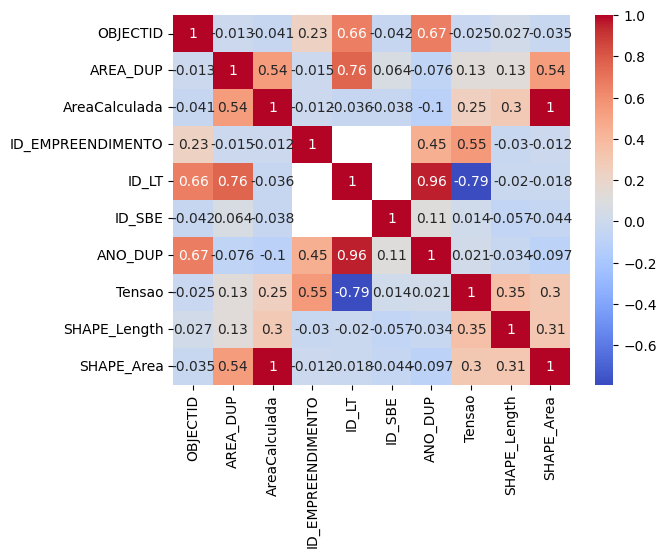

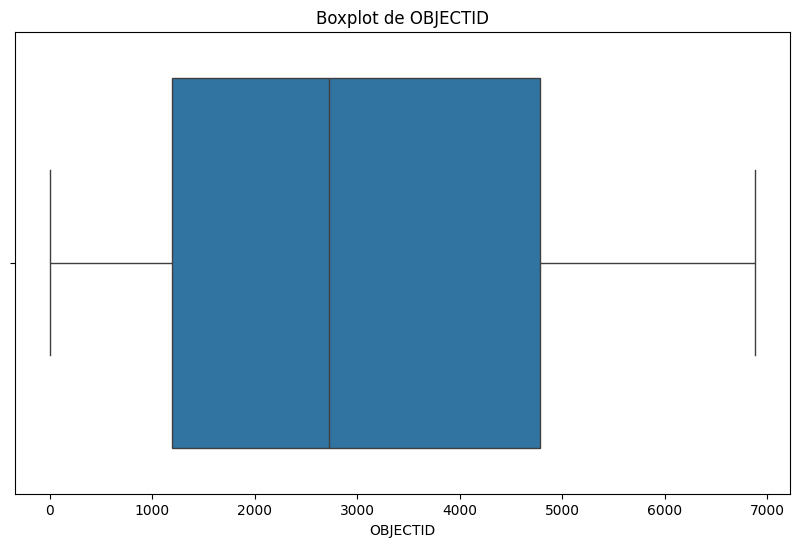

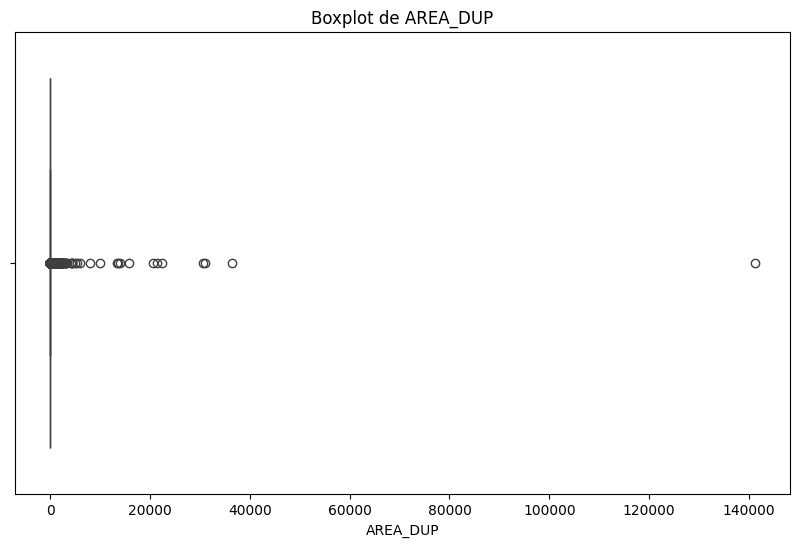

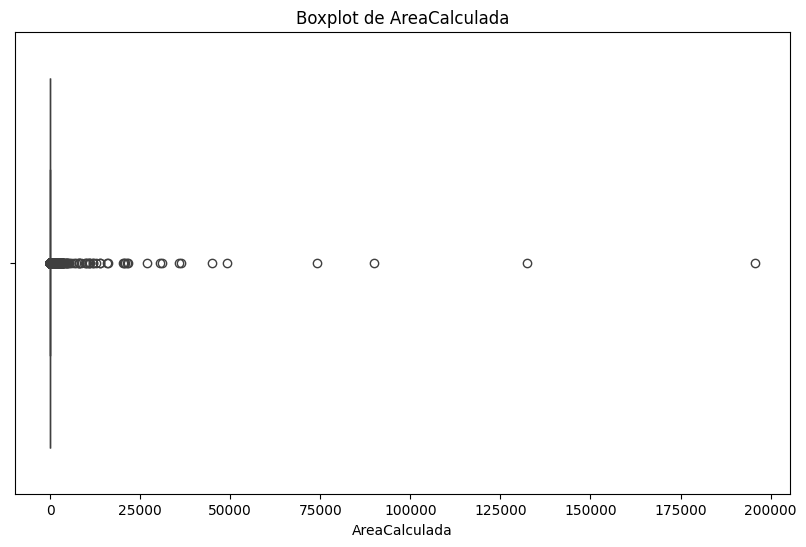

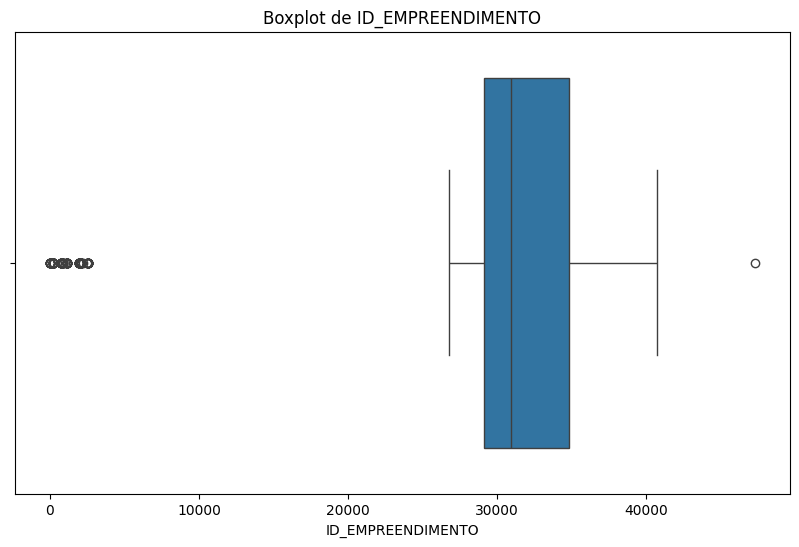

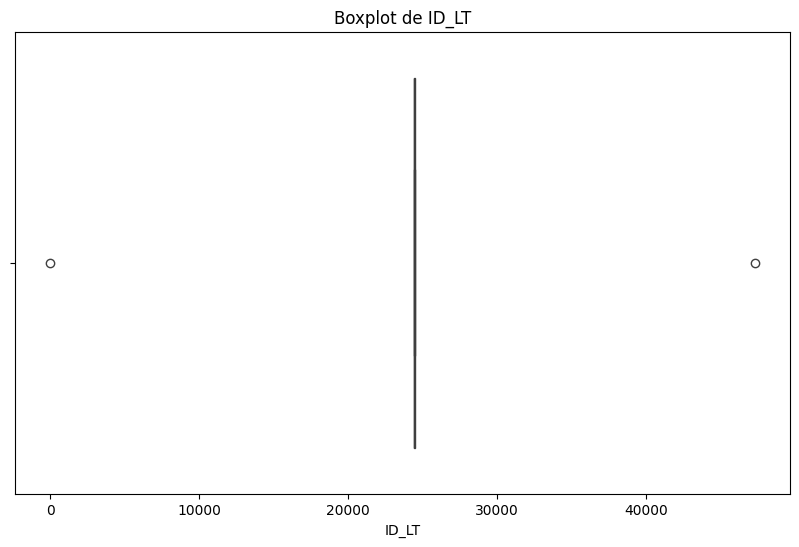

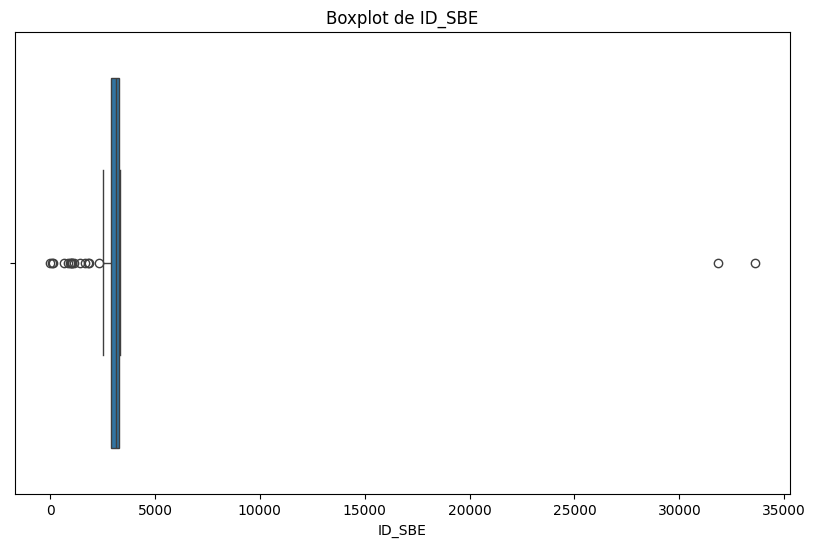

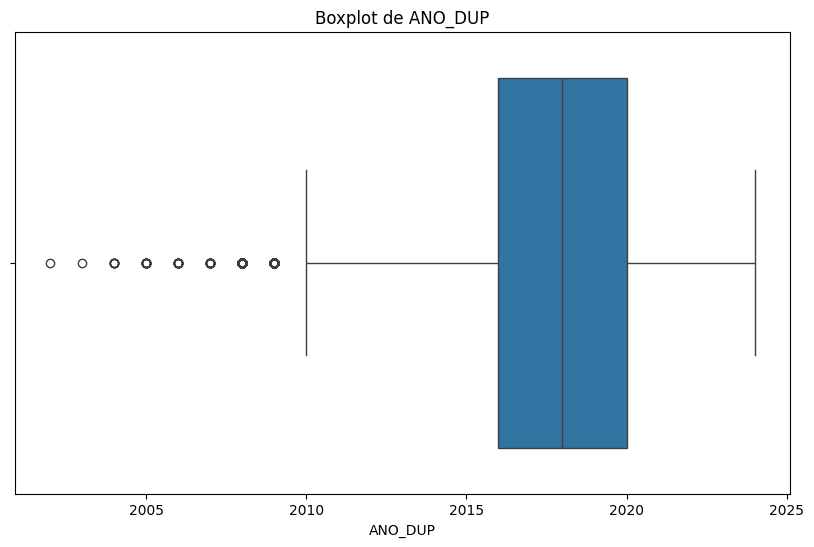

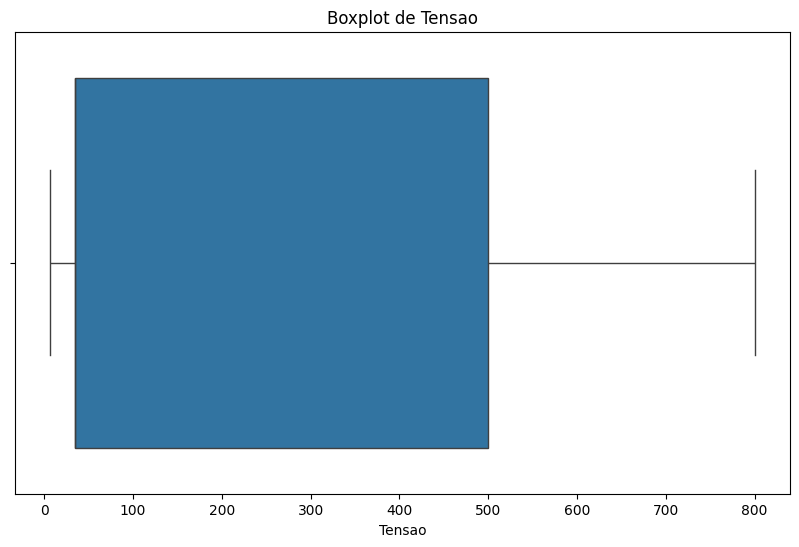

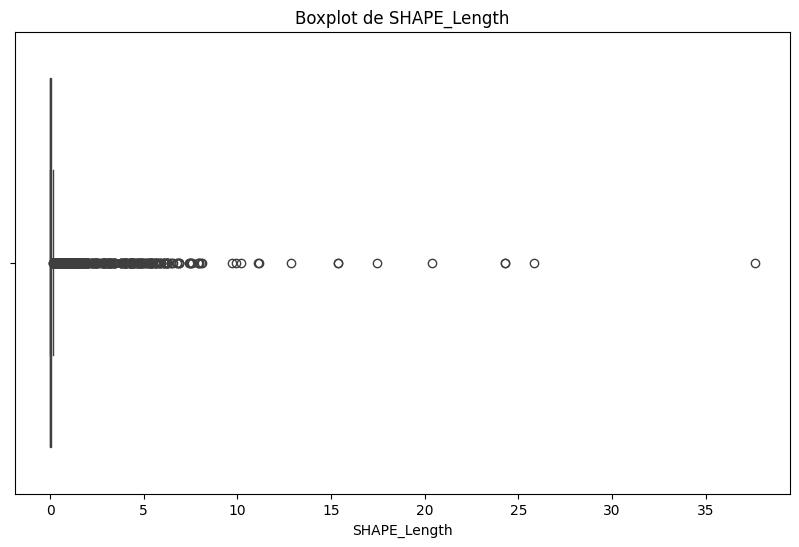

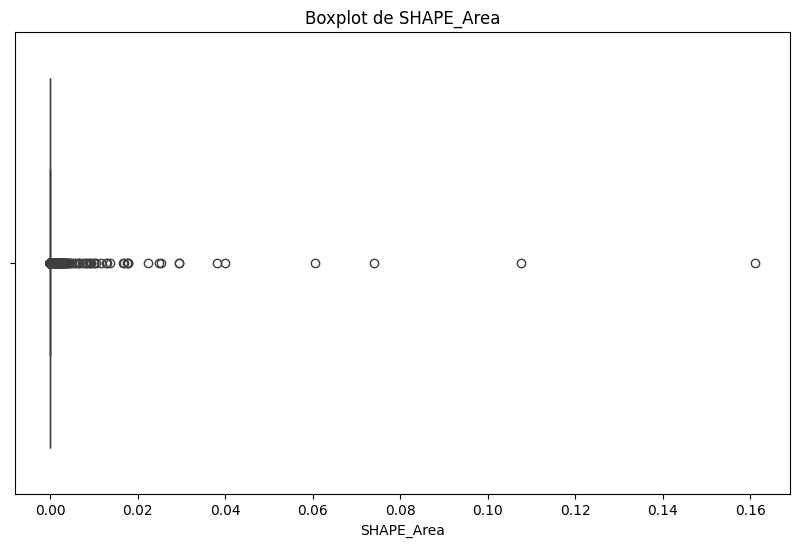

In [50]:

desc_stats_quantitativas = divergentes.describe()
print(desc_stats_quantitativas)

for coluna in divergentes.select_dtypes(include="object").columns:
    plt.figure(figsize=(15, 6))
    plt.subplots_adjust(wspace=0.5)
    plt.subplot(1, 2, 1)
    sns.countplot(x=coluna, data=divergentes, palette="viridis")
    plt.title(f'Distribuição de {coluna}')

    plt.subplot(1, 2, 2)
    divergentes[coluna].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("viridis", len(divergentes[coluna].unique())))
    plt.title(f'Proporção de {coluna}')

    plt.show()

corr_matrix = divergentes.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

for coluna in divergentes.select_dtypes(include=["int64", "float64"]).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=divergentes[coluna])
    plt.title(f'Boxplot de {coluna}')
    plt.show()


fluxo


In [96]:
import imaplib
import email
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders

# Configurações do servidor de e-mail
EMAIL = ''
PASSWORD = ''
IMAP_SERVER = 'imap.gmail.com'
SMTP_SERVER = 'smtp.gmail.com'
SMTP_PORT = 587

# Função para autenticar-se no servidor IMAP
def login_imap():
    mail = imaplib.IMAP4_SSL(IMAP_SERVER)
    mail.login(EMAIL, PASSWORD)
    mail.select('inbox')
    return mail

# Função para buscar e-mails com anexos de base de dados SQL
def search_emails(mail):
    result, data = mail.search(None, '(FROM "arthur.henrique.elias@gmail.com" SUBJECT "BDGD")')
    email_ids = data[0].split()
    for email_id in email_ids:
        result, data = mail.fetch(email_id, '(RFC822)')
        raw_email = data[0][1]
        msg = email.message_from_bytes(raw_email)
        if msg.get_content_maintype() == 'multipart':
            for part in msg.walk():
                if part.get_content_maintype() == 'application' and part.get('Content-Disposition'):
                    filename = part.get_filename()
                    if filename.endswith('.sql'):
                        return part.get_payload(decode=True)

# Função para enviar e-mail com a base de dados divergente
def send_email(filename):
    msg = MIMEMultipart()
    msg['From'] = EMAIL
    msg['To'] = EMAIL
    msg['Subject'] = 'Base de Dados Divergente'

    body = "Segue em anexo a base de dados divergente."
    msg.attach(MIMEText(body, 'plain'))

    attachment = open(filename, "rb")
    part = MIMEBase('application', 'octet-stream')
    part.set_payload((attachment).read())
    encoders.encode_base64(part)
    part.add_header('Content-Disposition', "attachment; filename= %s" % filename)
    msg.attach(part)

    server = smtplib.SMTP(SMTP_SERVER, SMTP_PORT)
    server.starttls()
    server.login(EMAIL, PASSWORD)
    text = msg.as_string()
    server.sendmail(EMAIL, EMAIL, text)
    server.quit()

def main():
    mail = login_imap()
    sql_content = search_emails(mail)


    with open('base_divergente.sql', 'wb') as f:
        f.write(sql_content)
        send_email('base_divergente.sql')

if __name__ == "__main__":
    main()


In [89]:
import smtplib
import email.message
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders

def enviar_email():
    msg = MIMEMultipart()
    msg['Subject'] = "BDGD"
    msg['Subject'] = "BDGD"
    msg['From'] = ''
    msg['To'] = ''
    password = ''

    corpo_email = """
    <p>Olá,</p>
    <p>Estou enviando um anexo com os acordos divergentes encontrados.</p>
    """
    corpo = MIMEText(corpo_email, 'html')
    msg.attach(corpo)

    filename = "/content/base_divergente.sql"
    with open(filename, "rb") as attachment:
        part = MIMEBase("application", "octet-stream")
        part.set_payload(attachment.read())
        encoders.encode_base64(part)
        part.add_header(
            "Content-Disposition",
            f"attachment; filename= {filename.split('/')[-1]}",
        )
        msg.attach(part)

    with smtplib.SMTP('smtp.gmail.com: 587') as s:
        s.starttls()
        s.login(msg['From'], password)
        s.sendmail(msg['From'], [msg['To']], msg.as_string().encode('utf-8'))
    print('Email enviado')

enviar_email()



Email enviado


In [92]:
import smtplib
import email.message
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders
import os

def enviar_email():
    msg = MIMEMultipart()
    msg['Subject'] = "BDGD"
    msg['From'] = ''
    msg['To'] = ''
    password = ''

    filename = "/content/base_divergente.sql"
    if os.path.exists(filename):
        corpo_email = """
        <p>Olá,</p>
        <p>Estou enviando um anexo com os acordos divergentes encontrados.</p>
        """
        corpo = MIMEText(corpo_email, 'html')
        msg.attach(corpo)

        with open(filename, "rb") as attachment:
            part = MIMEBase("application", "octet-stream")
            part.set_payload(attachment.read())
            encoders.encode_base64(part)
            part.add_header(
                "Content-Disposition",
                f"attachment; filename= {filename.split('/')[-1]}",
            )
            msg.attach(part)
        with smtplib.SMTP('smtp.gmail.com: 587') as s:
            s.starttls()
            s.login(msg['From'], password)
            s.sendmail(msg['From'], [msg['To']], msg.as_string().encode('utf-8'))
        print('Email enviado')
    else:
        print("Não foram encontrados dados divergentes para anexar ao e-mail.")

enviar_email()


Email enviado
